## Introduccion
El trabajo practico de Big data abarcara la tematica de analisis de sentimiento sobre diferentes series las cuales han salido en television, ademas de contar una de las series mas actuales, las series en cuestion son:

"Adventure Time": Una serie animada llena de aventuras y fantasía que sigue las travesías de Finn, un valiente niño humano, y su leal amigo Jake, un perro con la capacidad de cambiar de forma, mientras exploran la Tierra de Ooo y se enfrentan a desafíos épicos.

"Regular Show" es una serie animada de comedia que sigue las aventuras de dos amigos, Mordecai, un arrendajo azul, y Rigby, un mapache. Ambos trabajan como jardineros en un parque, pero en lugar de realizar tareas comunes, se ven envueltos en situaciones surrealistas y cómicas. Juntos, enfrentan desafíos, se encuentran con personajes extravagantes y descubren que incluso las tareas más simples pueden convertirse en emocionantes aventuras. La serie es conocida por su humor absurdo, referencias a la cultura pop y personajes carismáticos. "Regular Show" ofrece una combinación única de humor, amistad y elementos fantásticos que la han convertido en una de las series animadas más queridas de los últimos tiempos.

"The Boys": Una historia oscura y subversiva que sigue a un grupo de vigilantes que se enfrentan a superhéroes corruptos que abusan de su poder en un mundo donde son tratados como celebridades.

 Para este trabajo los resultados se esperan mas criticas positivas que negativas para regular show como hora de aventura, esperando que las criticas negativas sean menos del 30%, por otro lado, para the boys se espera que la critica sea mayormente positiva, a pesar de su controversia.

## Desarrollo del trabajo

### Instalaciones necesarias para realizar el trabajo

In [26]:
# pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c4665938143d9b8c2afe64287d0eff0f7622fe877f2678cea0efb1407b3ad730
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\d1\c1\d9\7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [27]:
# pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [35]:
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
# pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [81]:
# nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


True

In [2]:
# vamos a importar todas las variables.
import requests
import csv
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [5]:
# Headers para simular un usuario real a la pagina web
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

In [6]:
rAT = requests.get('https://www.imdb.com/title/tt1305826/reviews?ref_=tt_urv', headers=headers)#, proxies=proxies)
rRS = requests.get('https://www.imdb.com/title/tt1710308/reviews?ref_=tt_urv', headers=headers)#, proxies=proxies)
rTB = requests.get('https://www.imdb.com/title/tt1190634/reviews?ref_=tt_urv', headers=headers)#, proxies=proxies)
r = [rAT,rRS,rTB]

### Exploracion

In [7]:
for i in range(0,3):
    print(r[i])

<Response [200]>
<Response [200]>
<Response [200]>


In [8]:
hAT,hRS,hTB = rAT.content,rRS.content,rTB.content

In [9]:
h = hAT,hRS,hTB

In [10]:
for i in range(0,3):
    print(h[i])

b'\n \n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n        \n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);\n\n\n    var ue_err_chan = \'jserr\';\n(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel

In [11]:
sAT,sRS,sTB = BeautifulSoup(hAT),BeautifulSoup(hRS),BeautifulSoup(hTB)

In [12]:
commentAT = sAT.find_all('div', attrs={'class':'text show-more__control clickable'})
commentRS = sAT.find_all('div', attrs={'class':'text show-more__control clickable'})
commentTB = sAT.find_all('div', attrs={'class':'text show-more__control clickable'})
comments = [commentAT,commentRS,commentTB]

In [13]:
sAT.find('div', attrs={'class':'content'})
sAT.text

'\n\n\n\n\n\n\n\n\n\nAdventure Time (TV Series 2010–2018) - Adventure Time (TV Series 2010–2018) - User Reviews - IMDb\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenuMoviesRelease CalendarTop 250 MoviesMost Popular MoviesBrowse Movies by GenreTop Box OfficeShowtimes & TicketsMovie NewsIndia Movie SpotlightTV ShowsWhat\'s on TV & StreamingTop 250 TV ShowsMost Popular TV ShowsBrowse TV Shows by GenreTV NewsWatchWhat to WatchLatest TrailersIMDb OriginalsIMDb PicksIMDb PodcastsAwards & EventsOscarsABFFPride MonthOutfest OutfrontsSTARmeter AwardsAwards CentralFestival CentralAll EventsCelebsBorn TodayMost Popular CelebsMost Popular CelebsCelebrity NewsCommunityHelp CenterContributor ZonePollsFor Industry ProfessionalsAllAllTitlesTV EpisodesCelebsCompaniesKeywordsAdvanced SearchWatchlistSign InENFully supportedEnglish (United States)Parti

In [27]:
# Traemos los datos que vamos a emplear
# guardamos las urls
urls = [
    {"title": "Regular Show", "url": "https://www.imdb.com/title/tt1710308/reviews?sort=totalVotes&dir=desc&ratingFilter=0"},
    {"title": "Adventure Time", "url": "https://www.imdb.com/title/tt1305826/reviews?sort=totalVotes&dir=desc&ratingFilter=0"},
    {"title": "The Boys", "url": "https://www.imdb.com/title/tt1190634/reviews?sort=totalVotes&dir=desc&ratingFilter=0"}
]

data = []

# Toma de datos basicos para operar los ciclos de abajo
for url_data in urls:
    title = url_data["title"]
    url = url_data["url"]
    response = requests.get(url)
    content = response.content
    soup = BeautifulSoup(content, "html.parser")
    reviews = soup.find_all("div", class_="lister-item-content")

    if title == "Adventure Time":
        max_pages = 9
    elif title == "Regular Show":
        max_pages = 7
    elif title == "The Boys":
        max_pages = 108
        
    # Numero maximo de "show more" que le dara y lo hara para cada una de las paginas que hemos seleccionado en urls
    for page in range(1, max_pages + 1):
        page_url = url + "&page=" + str(page)
        response = requests.get(page_url)
        content = response.content
        soup = BeautifulSoup(content, "html.parser")
        reviews = soup.find_all("div", class_="lister-item-content")

        # Escaneado y agregado de cada uno de los reviews para cual titulo le corresponda
        for review in reviews:
            comment = review.find("div", class_="text").text.strip()
            rating = review.find("span", class_="").text.strip()
            raw_date = review.find("span", class_="review-date").text.strip()
            review_date = datetime.strptime(raw_date, "%d %B %Y")  
            data.append({"Comment": comment, "Rating": rating, "Title": url_data["title"], "Date": review_date})

# Crear DataFrame con los datos obtenidos
df = pd.DataFrame(data)


In [28]:
df

,Comment,Rating,Title,Date
0,Regular Show is a fitting title for a program ...,10,Regular Show,2011-07-07
1,I cannot believe how STUPID and PERVERTED Cart...,1,Regular Show,2010-12-25
2,I agree that the show is awful. I also think i...,1,Regular Show,2011-01-02
3,I could not disagree more with the prior revie...,10,Regular Show,2011-04-20
4,"What do Monster Squad, Loverboy, Sylvester Sta...",10,Regular Show,2011-08-15
...,...,...,...,...
3095,One would think that a series about super hero...,1,The Boys,2019-07-29
3096,Can't say I recall seeing Anthony Star in any ...,9,The Boys,2019-10-28
3097,"Politics aside, there is a steep drop in writi...",1,The Boys,2020-10-07
3098,"Give it up, Bezos.\nIn two hours, Pixar did th...",1,The Boys,2019-07-27


In [29]:
dia = review.day  # Extraer el día
mes = review_date.month  # Extraer el mes
año = review_date.year  # Extraer el año

print("Día:", dia)
print("Mes:", mes)
print("Año:", año)

Día: None
Mes: 7
Año: 2019


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Comment  3100 non-null   object        
 1   Rating   3100 non-null   object        
 2   Title    3100 non-null   object        
 3   Date     3100 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 97.0+ KB


In [31]:
# Verificamos que funcione el datetime
reviews_mayo_2011 = df[(df['Date'].dt.month == 6) & (df['Date'].dt.year == 2011)]
cantidad_reviews_mayo_2011 = reviews_mayo_2011.shape[0]
print("Cantidad de reseñas en mayo de 2011:", cantidad_reviews_mayo_2011)

Cantidad de reseñas en mayo de 2011: 23


### Limpieza

In [66]:
dfL = df

In [67]:
dfL.head()

,Comment,Rating,Title,Date
0,Regular Show is a fitting title for a program ...,10,Regular Show,2011-07-07
1,I cannot believe how ST PID and PERVERTED Cart...,1,Regular Show,2010-12-25
2,I agree that the show is awful I also think i...,1,Regular Show,2011-01-02
3,I could not disagree more with the prior revie...,10,Regular Show,2011-04-20
4,What do Monster Squad Loverboy Sylvester Sta...,10,Regular Show,2011-08-15


In [65]:
# Por si algo se rompa de nuevo
dfL.drop('Cleaned comment', axis = 1, inplace = True)

In [68]:
# Transformo los valores en nulos para luego cambiarlos facilmente por media
dfL["Rating"] = dfL["Rating"].replace('Was this review helpful?  Sign in to vote.', np.nan)

In [69]:
# Paso los valores a numericos
dfL["Rating"] = pd.to_numeric(dfL["Rating"], errors='coerce')

In [70]:
dfL.isna().sum()

Comment    0
Rating     0
Title      0
Date       0
dtype: int64

In [71]:
# Calcular la media de la columna "Rating"
rating_mean = dfL["Rating"].mean()

# Rellenar los valores NaN en la columna "Rating" con la media
dfL["Rating"] = dfL["Rating"].fillna(round(rating_mean))

In [72]:
dfL["Rating"] = dfL["Rating"].astype(int)

In [73]:
valoresDistintos = dfL['Rating'].unique().tolist()
print(valoresDistintos)

[10, 1, 9, 8, 7, 2, 3, 6, 5]


In [61]:
# Guardo el df como csv
# df.to_csv('C:/Data/ratingSeries-Fechas-grandote.csv', index=False)

In [74]:
#Eliminar Emojis
def limpiar_emojis(texto):
    # Expresión regular para detectar emojis
    patron_emojis = re.compile("[U+2B55]|[U+1F6A8]|[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F1E0-\U0001F1FF]|[\U00002702-\U000027B0]|[\U000024C2-\U0001F251]|[\U0001F910-\U0001F9FF]|[\U0001F004]|[\U0001F600-\U0001F64F]|[\U0001F680-\U0001F6FF]|[\U0001F1E0-\U0001F1FF]|[\U000023F0-\U0001F53E]|[\U0001F170-\U0001F251]|[\U0001F900-\U0001F9FF]|[\U0001F600-\U0001F64F]|[\U0001F600-\U0001F64F]|\W|\d|_")
    
    # Remover emojis usando la expresión regular
    texto_limpio = patron_emojis.sub(" ", texto)
    
    return texto_limpio

dfL['Comment'] = dfL['Comment'].apply(limpiar_emojis)
dfL

,Comment,Rating,Title,Date
0,Regular Show is a fitting title for a program ...,10,Regular Show,2011-07-07
1,I cannot believe how ST PID and PERVERTED Cart...,1,Regular Show,2010-12-25
2,I agree that the show is awful I also think i...,1,Regular Show,2011-01-02
3,I could not disagree more with the prior revie...,10,Regular Show,2011-04-20
4,What do Monster Squad Loverboy Sylvester Sta...,10,Regular Show,2011-08-15
...,...,...,...,...
3095,One would think that a series about super hero...,1,The Boys,2019-07-29
3096,Can t say I recall seeing nthony Star in any ...,9,The Boys,2019-10-28
3097,Politics aside there is a steep drop in writi...,1,The Boys,2020-10-07
3098,Give it up ezos In two hours Pixar did thi...,1,The Boys,2019-07-27


In [75]:
# Limpiamos los comentarios
#creamos la funcion para limpiar los comentarios

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
dfL['Cleaned comment'] = dfL['Comment'].apply(clean)
dfL.head()


,Comment,Rating,Title,Date,Cleaned comment
0,Regular Show is a fitting title for a program ...,10,Regular Show,2011-07-07,Regular Show is a fitting title for a program ...
1,I cannot believe how ST PID and PERVERTED Cart...,1,Regular Show,2010-12-25,I cannot believe how ST PID and PERVERTED Cart...
2,I agree that the show is awful I also think i...,1,Regular Show,2011-01-02,I agree that the show is awful I also think it...
3,I could not disagree more with the prior revie...,10,Regular Show,2011-04-20,I could not disagree more with the prior revie...
4,What do Monster Squad Loverboy Sylvester Sta...,10,Regular Show,2011-08-15,What do Monster Squad Loverboy Sylvester Stall...


In [76]:
df.head()

,Comment,Rating,Title,Date,Cleaned comment
0,Regular Show is a fitting title for a program ...,10,Regular Show,2011-07-07,Regular Show is a fitting title for a program ...
1,I cannot believe how ST PID and PERVERTED Cart...,1,Regular Show,2010-12-25,I cannot believe how ST PID and PERVERTED Cart...
2,I agree that the show is awful I also think i...,1,Regular Show,2011-01-02,I agree that the show is awful I also think it...
3,I could not disagree more with the prior revie...,10,Regular Show,2011-04-20,I could not disagree more with the prior revie...
4,What do Monster Squad Loverboy Sylvester Sta...,10,Regular Show,2011-08-15,What do Monster Squad Loverboy Sylvester Stall...


In [77]:
# Definimos otro dataframe para no afectar el original
shows = dfL

In [85]:
shows.head()

,Comment,Rating,Title,Date,Cleaned comment,POS tagged
0,Regular Show is a fitting title for a program ...,10,Regular Show,2011-07-07,Regular Show is a fitting title for a program ...,"[(Regular, a), (Show, n), (fitting, a), (title..."
1,I cannot believe how ST PID and PERVERTED Cart...,1,Regular Show,2010-12-25,I cannot believe how ST PID and PERVERTED Cart...,"[(believe, v), (ST, n), (PID, n), (PERVERTED, ..."
2,I agree that the show is awful I also think i...,1,Regular Show,2011-01-02,I agree that the show is awful I also think it...,"[(agree, v), (show, n), (awful, a), (also, r),..."
3,I could not disagree more with the prior revie...,10,Regular Show,2011-04-20,I could not disagree more with the prior revie...,"[(could, None), (disagree, v), (prior, a), (re..."
4,What do Monster Squad Loverboy Sylvester Sta...,10,Regular Show,2011-08-15,What do Monster Squad Loverboy Sylvester Stall...,"[(Monster, a), (Squad, n), (Loverboy, n), (Syl..."


## Analisis de sentimiento con TextBlob

In [84]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

shows['POS tagged'] = shows['Cleaned comment'].apply(token_stop_pos)
shows.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Comment,Rating,Title,Date,Cleaned comment,POS tagged
0,Regular Show is a fitting title for a program ...,10,Regular Show,2011-07-07,Regular Show is a fitting title for a program ...,"[(Regular, a), (Show, n), (fitting, a), (title..."
1,I cannot believe how ST PID and PERVERTED Cart...,1,Regular Show,2010-12-25,I cannot believe how ST PID and PERVERTED Cart...,"[(believe, v), (ST, n), (PID, n), (PERVERTED, ..."
2,I agree that the show is awful I also think i...,1,Regular Show,2011-01-02,I agree that the show is awful I also think it...,"[(agree, v), (show, n), (awful, a), (also, r),..."
3,I could not disagree more with the prior revie...,10,Regular Show,2011-04-20,I could not disagree more with the prior revie...,"[(could, None), (disagree, v), (prior, a), (re..."
4,What do Monster Squad Loverboy Sylvester Sta...,10,Regular Show,2011-08-15,What do Monster Squad Loverboy Sylvester Stall...,"[(Monster, a), (Squad, n), (Loverboy, n), (Syl..."


In [86]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
shows['Lemma'] = shows['POS tagged'].apply(lemmatize)
shows.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,Comment,Rating,Title,Date,Cleaned comment,POS tagged,Lemma
0,Regular Show is a fitting title for a program ...,10,Regular Show,2011-07-07,Regular Show is a fitting title for a program ...,"[(Regular, a), (Show, n), (fitting, a), (title...",Regular Show fitting title program take ordi...
1,I cannot believe how ST PID and PERVERTED Cart...,1,Regular Show,2010-12-25,I cannot believe how ST PID and PERVERTED Cart...,"[(believe, v), (ST, n), (PID, n), (PERVERTED, ...",believe ST PID PERVERTED Cartoon Network get...
2,I agree that the show is awful I also think i...,1,Regular Show,2011-01-02,I agree that the show is awful I also think it...,"[(agree, v), (show, n), (awful, a), (also, r),...",agree show awful also think mature child sur...
3,I could not disagree more with the prior revie...,10,Regular Show,2011-04-20,I could not disagree more with the prior revie...,"[(could, None), (disagree, v), (prior, a), (re...",could disagree prior review find show intell...
4,What do Monster Squad Loverboy Sylvester Sta...,10,Regular Show,2011-08-15,What do Monster Squad Loverboy Sylvester Stall...,"[(Monster, a), (Squad, n), (Loverboy, n), (Syl...",Monster Squad Loverboy Sylvester Stallone ac...


In [87]:
# function to calculate subjectivity 
def getSubjectivity(comment):
    return TextBlob(comment).sentiment.subjectivity

# function to calculate polarity
def getPolarity(comment):
    return TextBlob(comment).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [135]:
fin_data = pd.DataFrame(shows[['Date','Rating','Comment','Title', 'Lemma']])

In [136]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Date,Rating,Comment,Title,Lemma,Polarity,Analysis
0,2011-07-07,10,Regular Show is a fitting title for a program ...,Regular Show,Regular Show fitting title program take ordi...,-0.014627,Negative
1,2010-12-25,1,I cannot believe how ST PID and PERVERTED Cart...,Regular Show,believe ST PID PERVERTED Cartoon Network get...,0.087121,Positive
2,2011-01-02,1,I agree that the show is awful I also think i...,Regular Show,agree show awful also think mature child sur...,-0.007071,Negative
3,2011-04-20,10,I could not disagree more with the prior revie...,Regular Show,could disagree prior review find show intell...,0.096154,Positive
4,2011-08-15,10,What do Monster Squad Loverboy Sylvester Sta...,Regular Show,Monster Squad Loverboy Sylvester Stallone ac...,0.073333,Positive


In [138]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    2439
Negative     436
Neutral      225
Name: Analysis, dtype: int64

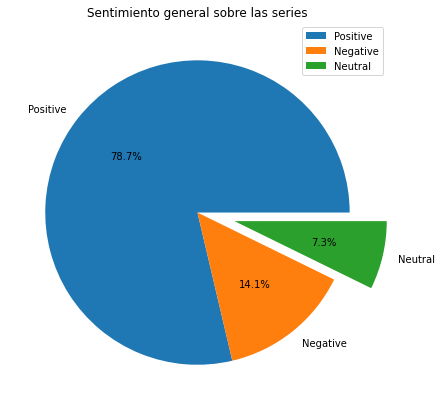

In [139]:
tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.title('Sentimiento general sobre las series')
plt.legend()

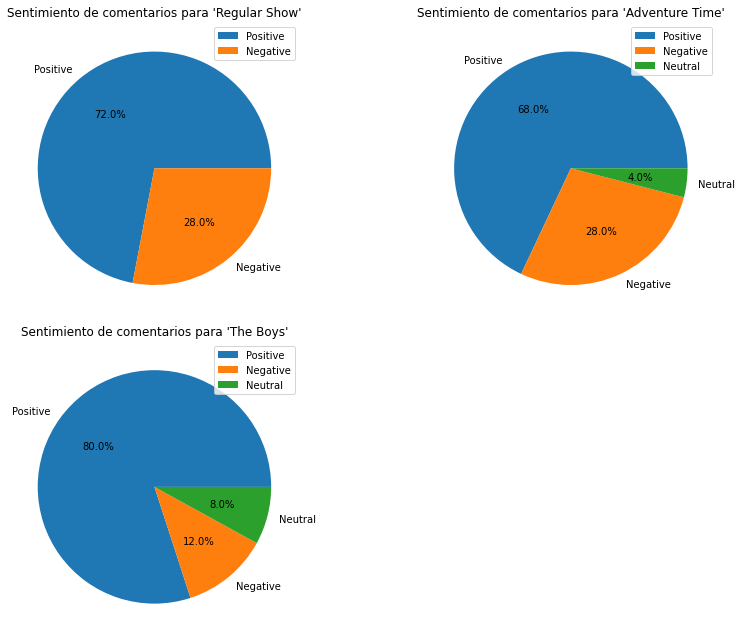

In [140]:
import matplotlib.pyplot as plt

# Obtener los títulos únicos
titles = fin_data['Title'].unique()

# Configuración general del gráfico
plt.figure(figsize=(12, 9))

# Iterar sobre los títulos
for i, title in enumerate(titles):
    # Filtrar los datos para el título actual
    data = fin_data[fin_data['Title'] == title]
    
    # Calcular el conteo de análisis de sentimiento
    sentiment_counts = data['Analysis'].value_counts()
    
    # Configuración del subplot correspondiente al título actual
    plt.subplot(2, 2, i + 1)  # Ajusta el número de subplots según tus necesidades
    plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', shadow=False)
    plt.title(f"Sentimiento de comentarios para '{title}'")
    plt.legend()

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [141]:
fin_data.describe()

,Rating,Polarity
count,3100.000000,3100.000000
mean,6.594839,0.175911
std,3.818786,0.234527
min,1.000000,-0.450000
25%,2.000000,0.025000
50%,9.000000,0.147237
75%,10.000000,0.373500
max,10.000000,0.650000


## Analisis de Sentimiento con Vader

In [142]:
# pip install vaderSentiment

In [143]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [144]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,Date,Rating,Comment,Title,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,2011-07-07,10,Regular Show is a fitting title for a program ...,Regular Show,Regular Show fitting title program take ordi...,-0.014627,Negative,-0.1531,Neutral
1,2010-12-25,1,I cannot believe how ST PID and PERVERTED Cart...,Regular Show,believe ST PID PERVERTED Cartoon Network get...,0.087121,Positive,0.2878,Neutral
2,2011-01-02,1,I agree that the show is awful I also think i...,Regular Show,agree show awful also think mature child sur...,-0.007071,Negative,0.6249,Positive
3,2011-04-20,10,I could not disagree more with the prior revie...,Regular Show,could disagree prior review find show intell...,0.096154,Positive,0.9517,Positive
4,2011-08-15,10,What do Monster Squad Loverboy Sylvester Sta...,Regular Show,Monster Squad Loverboy Sylvester Stallone ac...,0.073333,Positive,0.9867,Positive


In [145]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    1882
Neutral     1032
Negative     186
Name: Vader Analysis, dtype: int64

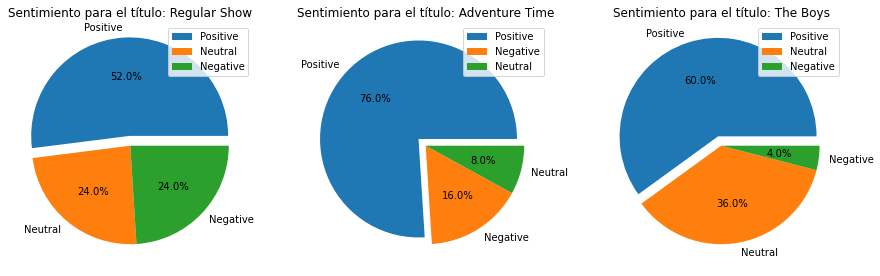

In [146]:
import matplotlib.pyplot as plt

titles = fin_data['Title'].unique()
num_titles = len(titles)

fig, axs = plt.subplots(1, num_titles, figsize=(15, 7))

for i, title in enumerate(titles):
    title_data = fin_data[fin_data['Title'] == title]
    vader_counts = title_data['Vader Analysis'].value_counts()
    axs[i].pie(vader_counts.values, labels=vader_counts.index, explode=(0.1, 0, 0), autopct='%1.1f%%', shadow=False)
    axs[i].set_title('Sentimiento para el título: ' + title)
    axs[i].legend()

plt.show()


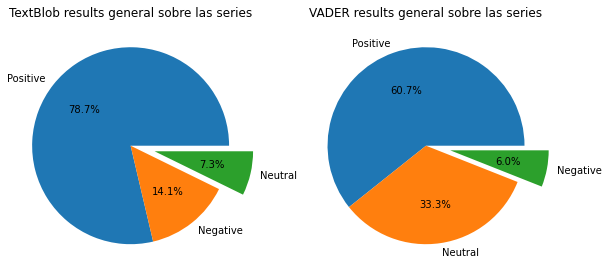

In [147]:
%matplotlib inline

# Calcular los conteos para TextBlob y VADER
tb_counts = fin_data['Analysis'].value_counts()
vader_counts = fin_data['Vader Analysis'].value_counts()

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results general sobre las series")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.subplot(1,3,2)
plt.title("VADER results general sobre las series")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.show()


In [155]:
adventure_time_data = df[df['Title'] == 'Adventure Time'].copy()
regular_show_data = df[df['Title'] == 'Regular Show'].copy()
the_boys_data = df[df['Title'] == 'The Boys'].copy()

In [164]:
adventure_time_data.head()

,Date,Rating,Comment,Title,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,Month
1385,2019-07-20,10,orget the ethics the quest for justice the ...,The Boys,orget ethic quest justice heart gold fill go...,0.2,Positive,0.9231,Positive,2019-07
1885,2019-07-20,10,orget the ethics the quest for justice the ...,The Boys,orget ethic quest justice heart gold fill go...,0.2,Positive,0.9231,Positive,2019-07
1285,2019-07-20,10,orget the ethics the quest for justice the ...,The Boys,orget ethic quest justice heart gold fill go...,0.2,Positive,0.9231,Positive,2019-07
2585,2019-07-20,10,orget the ethics the quest for justice the ...,The Boys,orget ethic quest justice heart gold fill go...,0.2,Positive,0.9231,Positive,2019-07
1860,2019-07-20,10,orget the ethics the quest for justice the ...,The Boys,orget ethic quest justice heart gold fill go...,0.2,Positive,0.9231,Positive,2019-07


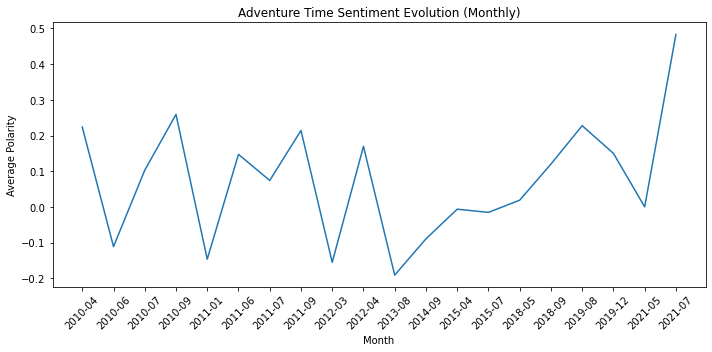

In [158]:
# Filtrar las filas con el título "Adventure Time"
adventure_time_data = fin_data[fin_data['Title'] == 'Adventure Time'].copy()

# Convertir la columna 'Date' a tipo datetime
adventure_time_data['Date'] = pd.to_datetime(adventure_time_data['Date'])

# Agrupar por mes y calcular la media de la polaridad
monthly_sentiment = adventure_time_data.groupby(adventure_time_data['Date'].dt.to_period('M')).mean()['Polarity']

# Convertir los períodos a cadenas de texto
monthly_sentiment.index = monthly_sentiment.index.astype(str)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(monthly_sentiment.index, monthly_sentiment.values)
plt.xlabel('Month')
plt.ylabel('Average Polarity')
plt.title('Adventure Time Sentiment Evolution (Monthly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


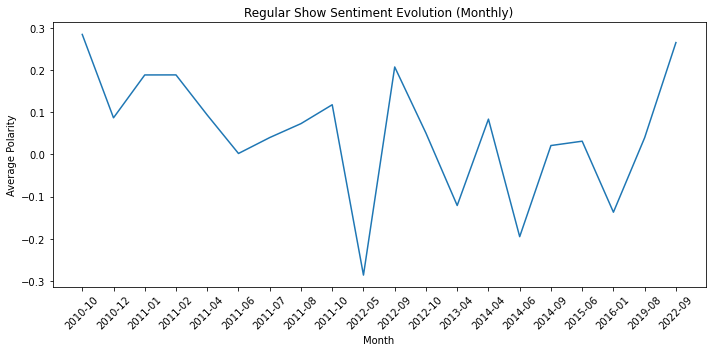

In [160]:
# Filtrar las filas con el título "Adventure Time"
adventure_time_data = fin_data[fin_data['Title'] == 'Regular Show'].copy()

# Convertir la columna 'Date' a tipo datetime
adventure_time_data['Date'] = pd.to_datetime(adventure_time_data['Date'])

# Agrupar por mes y calcular la media de la polaridad
monthly_sentiment = adventure_time_data.groupby(adventure_time_data['Date'].dt.to_period('M')).mean()['Polarity']

# Convertir los períodos a cadenas de texto
monthly_sentiment.index = monthly_sentiment.index.astype(str)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(monthly_sentiment.index, monthly_sentiment.values)
plt.xlabel('Month')
plt.ylabel('Average Polarity')
plt.title('Regular Show Sentiment Evolution (Monthly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


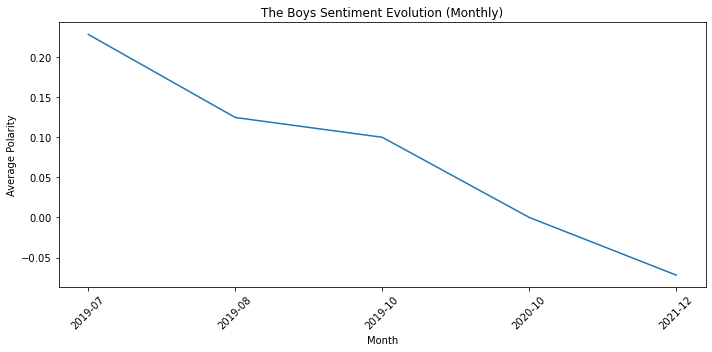

In [161]:
# Filtrar las filas con el título "Adventure Time"
adventure_time_data = fin_data[fin_data['Title'] == 'The Boys'].copy()

# Convertir la columna 'Date' a tipo datetime
adventure_time_data['Date'] = pd.to_datetime(adventure_time_data['Date'])

# Agrupar por mes y calcular la media de la polaridad
monthly_sentiment = adventure_time_data.groupby(adventure_time_data['Date'].dt.to_period('M')).mean()['Polarity']

# Convertir los períodos a cadenas de texto
monthly_sentiment.index = monthly_sentiment.index.astype(str)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(monthly_sentiment.index, monthly_sentiment.values)
plt.xlabel('Month')
plt.ylabel('Average Polarity')
plt.title('The Boys Sentiment Evolution (Monthly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


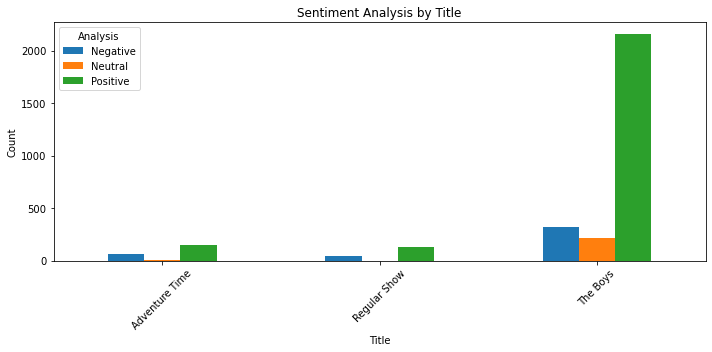

In [166]:
# Agrupar por título y análisis de sentimiento y contar las ocurrencias
sentiment_counts = fin_data.groupby(['Title', 'Analysis']).size()

# Crear el gráfico de barras para cada grupo
fig, ax = plt.subplots(figsize=(10, 5))
sentiment_counts.unstack(level=1).plot(kind='bar', ax=ax)

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Title')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis by Title')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


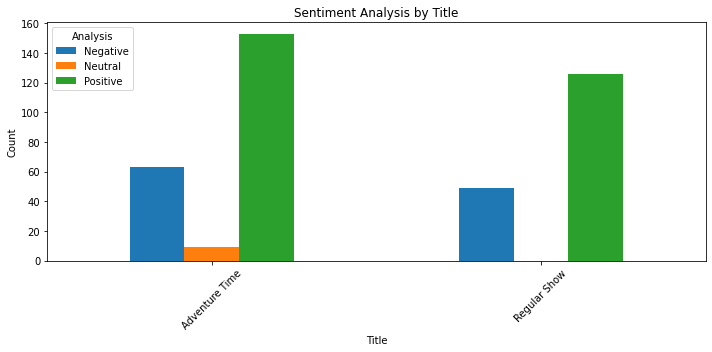

In [167]:
# Filtrar los datos excluyendo las filas con el título "The Boys"
filtered_data = fin_data[fin_data['Title'] != 'The Boys']

# Agrupar por título y análisis de sentimiento y contar las ocurrencias
sentiment_counts = filtered_data.groupby(['Title', 'Analysis']).size()

# Crear el gráfico de barras para cada grupo
fig, ax = plt.subplots(figsize=(10, 5))
sentiment_counts.unstack(level=1).plot(kind='bar', ax=ax)

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Title')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis by Title')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Conclusiones

Se puede concluir que hay cierta diferencia entre vader y textblob tienen diferentes enfoques y diferentes manera de analizar los sentimientos, ademas de lexicons y recursos diferentes tambien tienen un procesamiento de texto diferente. Por otro lado y respecto a las series analizadas en este trabajo podemos observar que las series tienen distintos tipos de animaciones o actuacion. Se puede observar peculiarmente en The Boys como el sentimiento era tan bueno al principio de la serie es bastante bueno, pero a medida que avanza la serie van apareciendo las opiniones negativas, sin embargo es una de las series que tiene el analisis de sentimiento positivo bastante alto. Posteriormente tenemos a Regular show, el cual, si bien no posee tantos ratings, es una de las series que no cuenta con comentarios neutros, sino o positivos o negativos. 

Finalmente tenemos a hora de aventura, una de las series que si bien era una serie bastante regular antes de convertirse en una serie completamente controversial lo cual se refleja en las criticas tanto negativas como positivas. Para este trabajo el resultado esperado si bien no ha sido del todo acertado ha demostrado que se acerca bastante a lo que seria la hipotesis, es decir, existen bastantes comentarios negativos para las series animadas, por otro lado, The boys ha demostrado tener los resultados esperados.